## Data Analysis for Round 1

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

import sys
sys.path.append('./../')  # Add the parent directory to Python path
from plot_utils_CY import *

## Outline for Overall
1. Data Loading: Load your trading data into a Pandas DataFrame. This could be in the form of a CSV file, a database query result, or any other structured data format.
1. Data Cleaning: Clean the data by handling missing values, removing duplicates, and converting data types if necessary.
1. Data Manipulation: Perform data manipulation tasks such as calculating returns, creating new features, or aggregating data.
1. Data Analysis: Analyze the trading data using statistical methods and visualizations. See below `Outline for Data Analysis` for specifics.
1. Performance Metrics: Calculate performance metrics such as Sharpe Ratio, Maximum Drawdown, and Win Rate.
1. Visualization: Visualize performance metrics and other relevant information using Matplotlib or other plotting libraries.

### Data Loading
* Loading price data and trade data into dataframes
* Merging data of the same format from different days

In [5]:
path = './../../shared_data/round1/'
days = [-2, -1, 0]

prices = [pd.read_csv(path + f'prices_round_1_day_{d}.csv', sep=';') for d in days]
price = pd.concat(prices)
price

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
1,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0
2,-2,100,AMETHYSTS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0
19996,0,999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,1,5054.0,27.0,NaN,NaN,5049.5,0.0
19997,0,999800,AMETHYSTS,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0
19998,0,999900,STARFRUIT,5048,2,5047.0,21.0,NaN,NaN,5054,23,NaN,NaN,NaN,NaN,5051.0,0.0


In [6]:
trades = [pd.read_csv(path + f'trades_round_1_day_{d}_nn.csv', sep=';', ).assign(day=d) for d in days]
trade = pd.concat(trades)
trade

,timestamp,buyer,seller,symbol,currency,price,quantity,day
0,0,NaN,NaN,AMETHYSTS,SEASHELLS,9996.0,1,-2
1,0,NaN,NaN,STARFRUIT,SEASHELLS,5003.0,1,-2
2,0,NaN,NaN,AMETHYSTS,SEASHELLS,9996.0,1,-2
3,100,NaN,NaN,STARFRUIT,SEASHELLS,5004.0,6,-2
4,900,NaN,NaN,STARFRUIT,SEASHELLS,5001.0,2,-2
...,...,...,...,...,...,...,...,...
5312,998800,NaN,NaN,STARFRUIT,SEASHELLS,5050.0,1,0
5313,998800,NaN,NaN,AMETHYSTS,SEASHELLS,10002.0,1,0
5314,999500,NaN,NaN,AMETHYSTS,SEASHELLS,9995.0,2,0
5315,999500,NaN,NaN,STARFRUIT,SEASHELLS,5049.0,2,0


### Data Cleaning
* Counting the number of missing values in the data, per column

In [5]:
price.isna().sum()

day                    0
timestamp              0
product                0
bid_price_1            0
bid_volume_1           0
bid_price_2        26408
bid_volume_2       26408
bid_price_3        53602
bid_volume_3       53602
ask_price_1            0
ask_volume_1           0
ask_price_2        26994
ask_volume_2       26994
ask_price_3        53324
ask_volume_3       53324
mid_price              0
profit_and_loss        0
dtype: int64

In [6]:
trade.isna().sum()

timestamp        0
buyer        16150
seller       16150
symbol           0
currency         0
price            0
quantity         0
day              0
dtype: int64

## Outline for Data Analysis
1. Descriptive Statistics: see below 
1. Visualization: see below `Outline for Data Visualization` for details
1. Correlation Analysis: see below `Outline for Correlation Analysis` for details
1. Volatility Analysis: see below `Outline for Volatility Analysis` for details
1. Autocorrelation Analysis: see below `Outline for Autocorrelation Analysis` for details
1. Stationarity Analysis: see below `Outline for Stationarity Analysis` for details
1. Seasonality Analysis: see below `Outline for Seasonality Analysis` for details
1. Modeling: see below `Outline for Data Modeling` for details
1. Outlier Detection: see below `Outline for Outlier Detection` for details

### Outline for Data Visualization 
For each day and each product, make -
1. An overlayed time series plot of bid, ask, mid prices
   * line of `mid_price`
   * scatter of `bid_price_1` sized by `bid_volume_1`
   * scatter of `ask_price_1` sized by `ask_volume_1`
   * scatter of `price` sized by `quantity` (from `trade` dataframe)

1. A time series plot of moving average 
   * line of `mid_price`
   * line of moving average of `mid_price`

1. A plot of only traded prices
   * scatter of `price` sized by `quantity` (from `trade` dataframe)

1. A plot of overlayed individual bids and asks distribution
   * histogram of `bid_price_1`, scaled by 'bid_volume_1'
   * histogram of `ask_price_1`, scaled by 'ask_volume_1'

1. A histogram of bid-ask spread
   * histogram of `bid_price_1` - `ask_price_1`

An overlayed time series plot of prices
   * line of `mid_price`
   * scatter of `bid_price_1` sized by `bid_volume_1`
   * scatter of `ask_price_1` sized by `ask_volume_1`
   * scatter of `price` sized by `quantity` (from `trade` dataframe)

In [7]:
# Overlayed time series plot of prices
products = price['product'].unique()

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/2729832799.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/2729832799.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


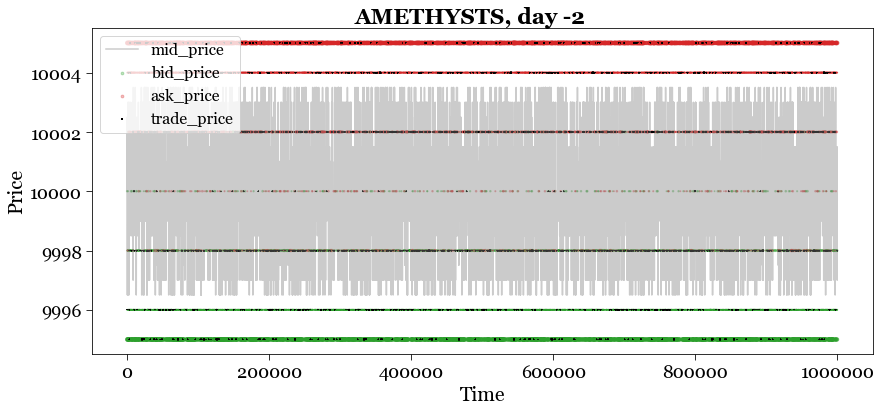

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/2729832799.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/2729832799.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


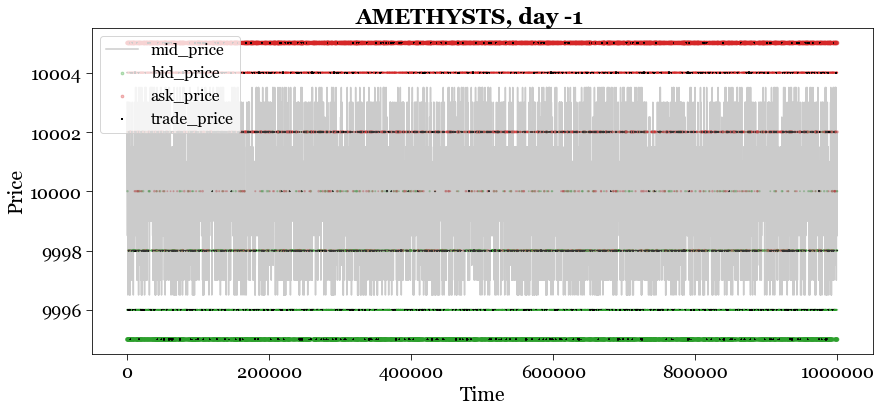

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/2729832799.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/2729832799.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


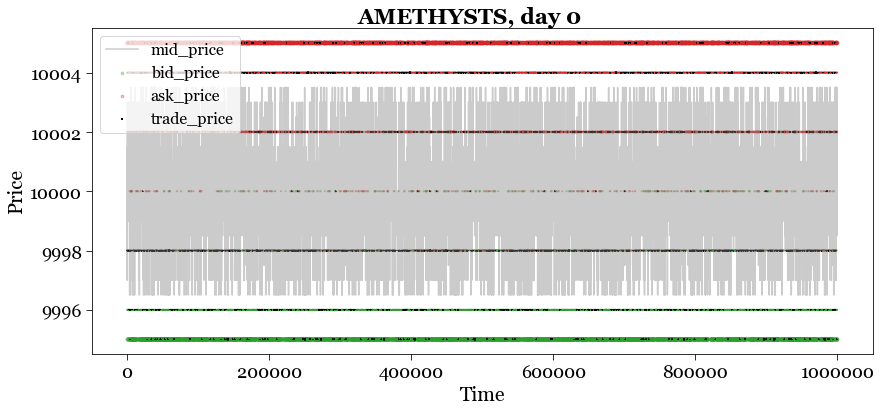

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/2729832799.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/2729832799.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


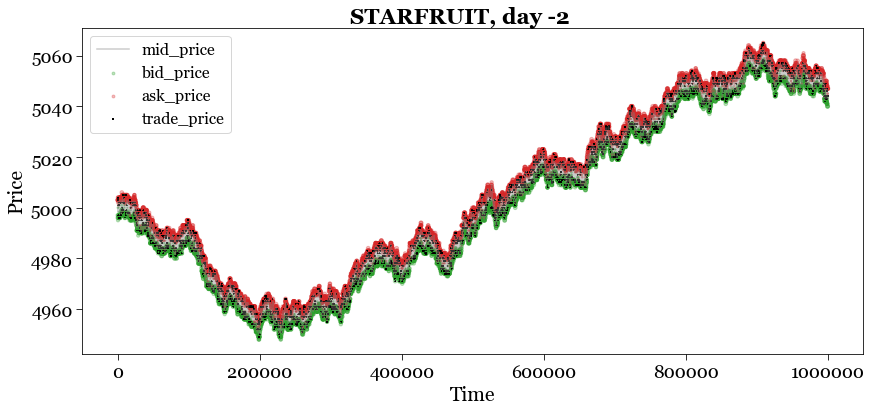

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/2729832799.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/2729832799.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


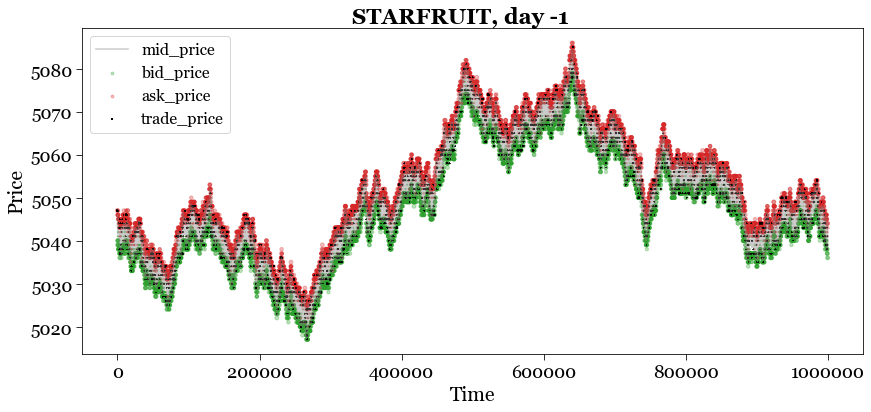

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/2729832799.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/2729832799.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


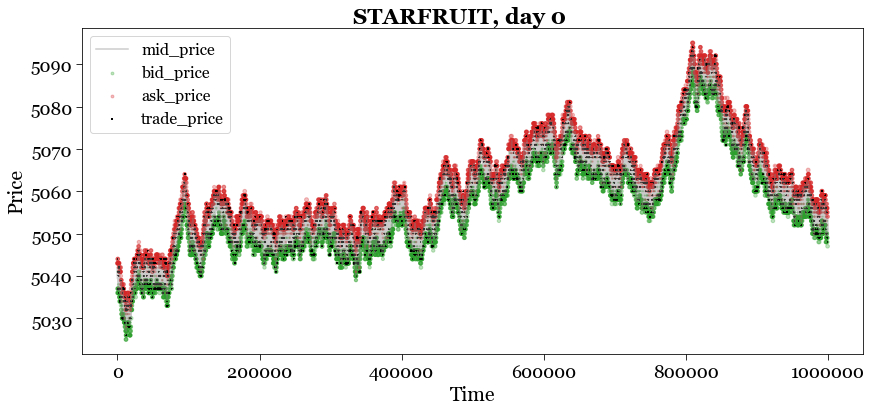

In [7]:
for product in products:
    for day in days:
        filtered_trade = trade[(trade['day'] == day) & (trade['symbol'] == product)]
        filtered_price = price[(price['day'] == day) & (price['product'] == product)]
        fig = plt.figure(figsize=(14, 6))
        ax = plt.gca()

        xs = filtered_price['timestamp']
        mids = filtered_price['mid_price']
        bids = filtered_price['bid_price_1']
        asks = filtered_price['ask_price_1']
        ax.plot(xs, mids, label='mid_price', 
                color=tableau_colors[7], alpha=0.4)
        ax.scatter(xs, bids, label='bid_price', alpha=0.3,
                   color=tableau_colors[2], marker='o', s=0.5*filtered_price['bid_volume_1'])
        ax.scatter(xs, asks, label='ask_price', alpha=0.3,
                   color=tableau_colors[3], marker='o', s=0.5*filtered_price['ask_volume_1'])
        ax.scatter(filtered_trade['timestamp'], filtered_trade['price'], label='trade_price', alpha=1,
                   color='black', marker='+', s=0.5*filtered_trade['quantity'])

        # Customize tick sizes
        ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
        # ax.set_xlim(0, 2000)
        # ax.set_ylim(0, 12000)
        ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
        ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

        # Customize the plot (optional)
        plt.xlabel('Time', fontdict=font)
        plt.ylabel('Price', fontdict=font)
        plt.gcf().set_facecolor('white')
        fig.suptitle(f'{product}, day {day}', fontproperties=suptitle_font, y=0.93)
        plt.legend(loc='upper left', prop=legend_font)

        # plt.savefig(f'./../plots/R1_{product}_day{day}_prices.png')
        # plt.savefig(f'./../plots/R1_{product}_day{day}_prices.pdf')
        plt.show()

A time series plot of moving average 
   * line of `mid_price`
   * line of moving average of `mid_price`

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/3459494774.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/3459494774.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


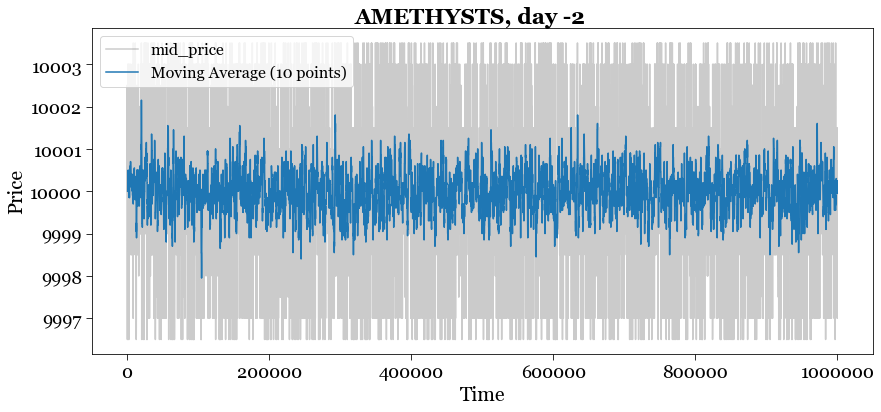

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/3459494774.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/3459494774.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


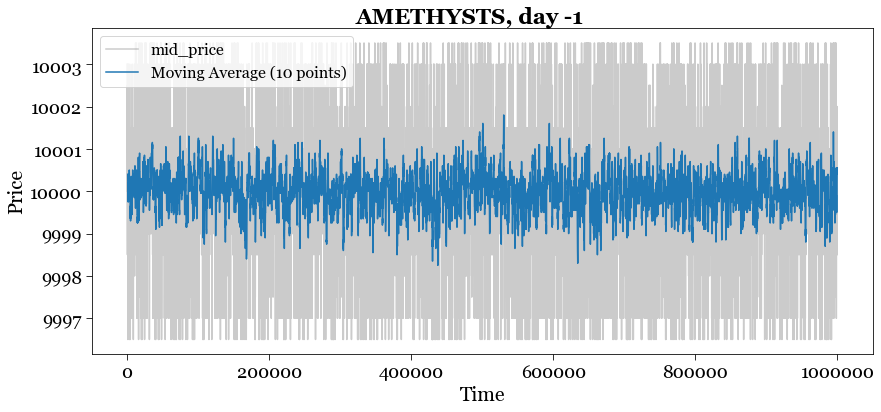

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/3459494774.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/3459494774.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


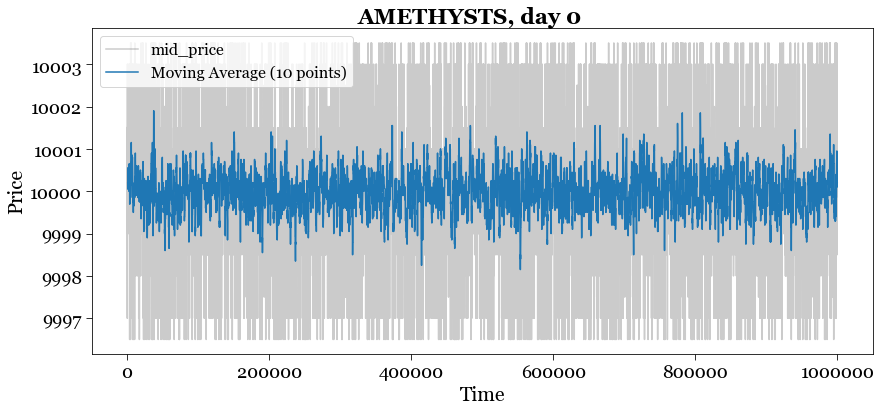

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/3459494774.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/3459494774.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


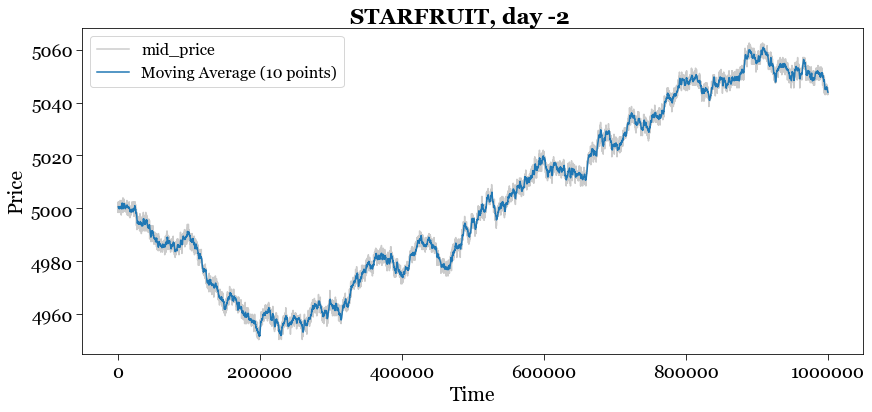

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/3459494774.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/3459494774.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


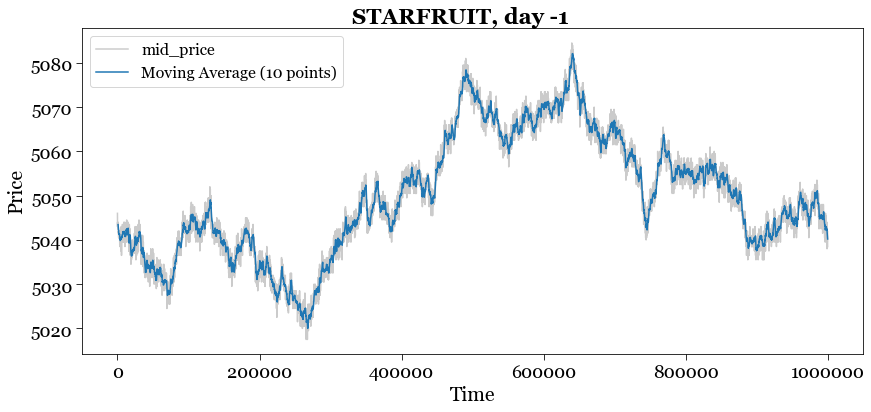

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/3459494774.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/3459494774.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


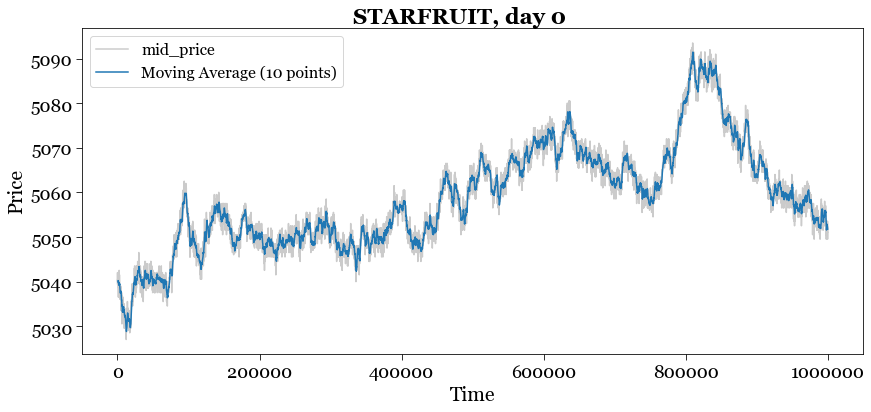

In [8]:
for product in products:
    for day in days:
        filtered_price = price[(price['day'] == day) & (price['product'] == product)]
        fig = plt.figure(figsize=(14, 6))
        ax = plt.gca()

        xs = filtered_price['timestamp']
        mids = filtered_price['mid_price']

        # Calculate the moving average
        window_size = 10
        mas = mids.rolling(window=window_size).mean()

        ax.plot(xs, mids, label='mid_price', 
                color=tableau_colors[7], alpha=0.4)
        ax.plot(xs, mas, label=f'Moving Average ({window_size} points)',
                color=tableau_colors[0], alpha=1) 
                
        # Customize tick sizes
        ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
        # ax.set_xlim(0, 2000)
        # ax.set_ylim(0, 12000)
        ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
        ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

        # Customize the plot (optional)
        plt.xlabel('Time', fontdict=font)
        plt.ylabel('Price', fontdict=font)
        plt.gcf().set_facecolor('white')
        fig.suptitle(f'{product}, day {day}', fontproperties=suptitle_font, y=0.93)
        plt.legend(loc='upper left', prop=legend_font)

        # plt.savefig(f'./../plots/R1_{product}_day{day}_moving_avg.png')
        # plt.savefig(f'./../plots/R1_{product}_day{day}_moving_avg.pdf')
        plt.show()

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/4247166785.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/4247166785.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


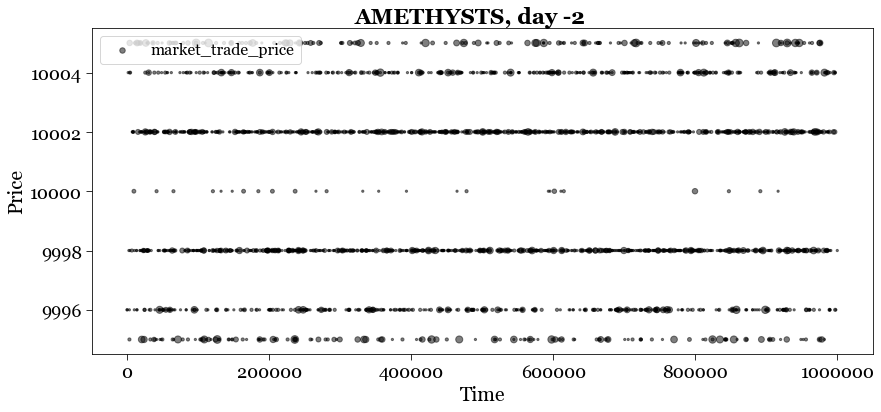

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/4247166785.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/4247166785.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


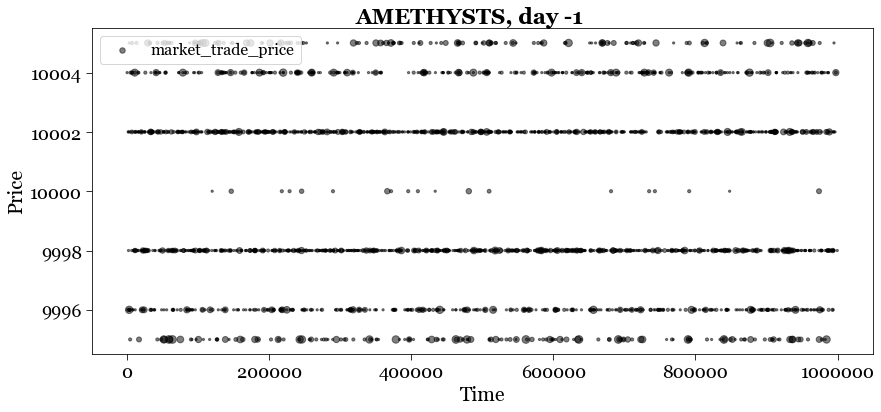

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/4247166785.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/4247166785.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


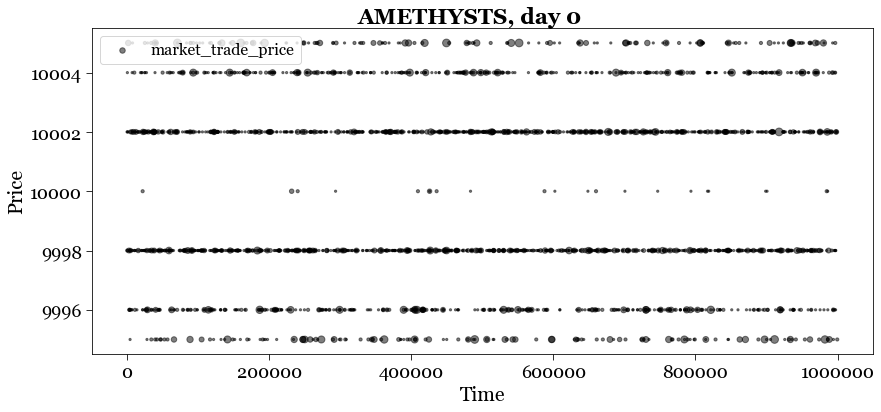

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/4247166785.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/4247166785.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


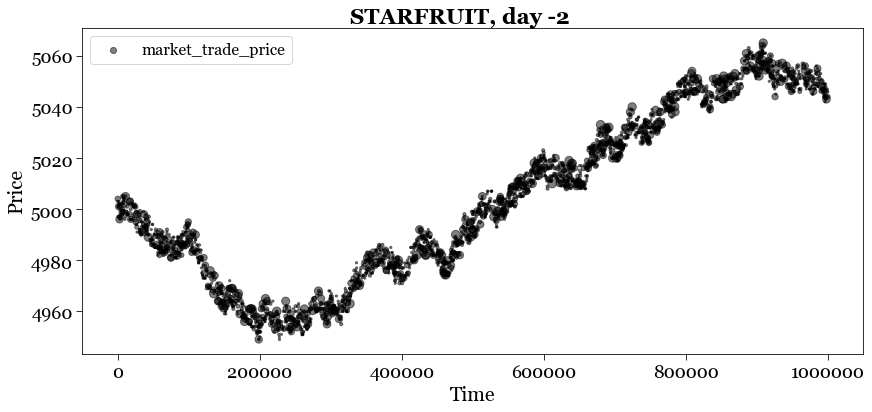

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/4247166785.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/4247166785.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


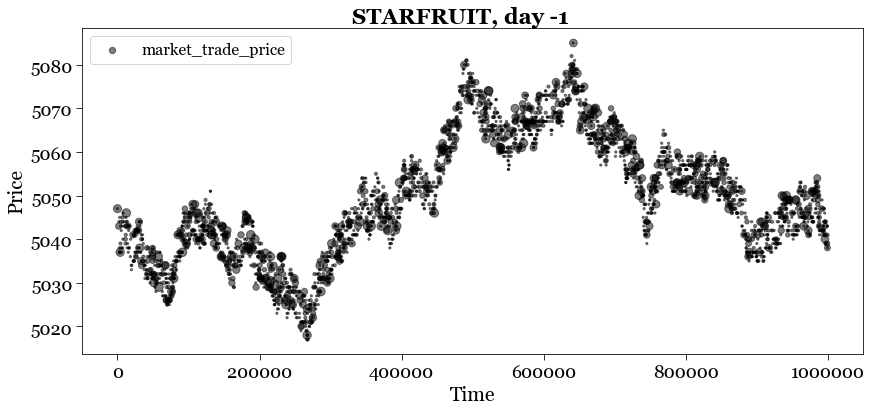

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/4247166785.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/4247166785.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


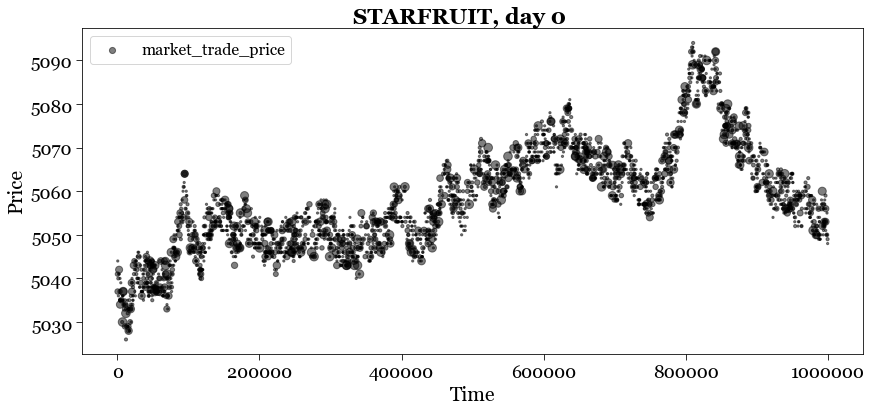

In [9]:
products = trade['symbol'].unique()

for product in products:
    for day in days:
        fig = plt.figure(figsize=(14, 6))
        ax = plt.gca()

        filtered_trade = trade[(trade['day'] == day) & (trade['symbol'] == product)]

        ax.scatter(filtered_trade['timestamp'], filtered_trade['price'], label='market_trade_price', alpha=0.5,
                   color='black', marker='o', s=5*filtered_trade['quantity'])

        # Customize tick sizes
        ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
        # ax.set_xlim(0, 2000)
        # ax.set_ylim(0, 12000)
        ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
        ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

        # Customize the plot (optional)
        plt.xlabel('Time', fontdict=font)
        plt.ylabel('Price', fontdict=font)
        plt.gcf().set_facecolor('white')
        fig.suptitle(f'{product}, day {day}', fontproperties=suptitle_font, y=0.93)
        plt.legend(loc='upper left', prop=legend_font)

        # plt.savefig(f'./../plots/R1_{product}_day{day}_market_trade_price.png')
        # plt.savefig(f'./../plots/R1_{product}_day{day}_market_trade_price.pdf')
        plt.show()

A histogram of trade price
   * histogram of `price`, scaled by `quantity`

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/2118941163.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/2118941163.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


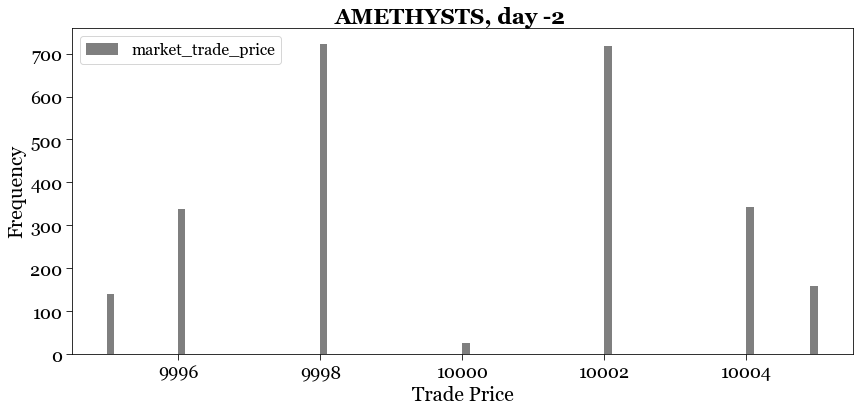

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/2118941163.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/2118941163.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


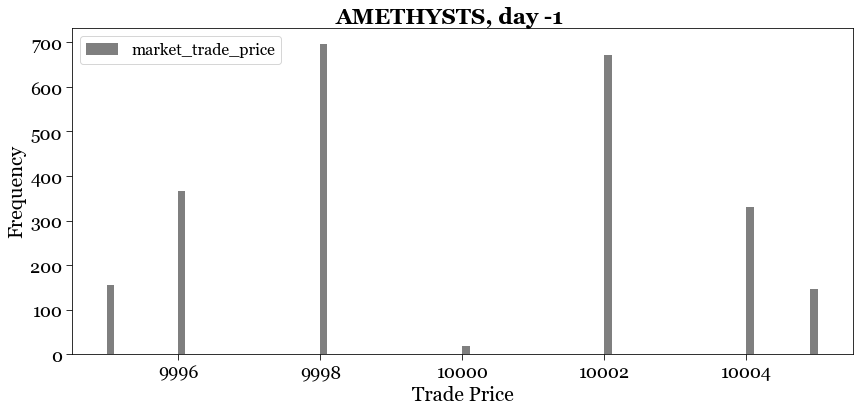

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/2118941163.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/2118941163.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


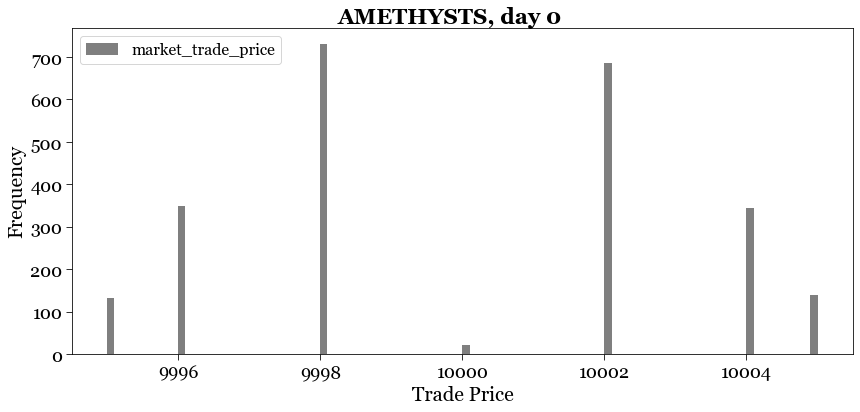

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/2118941163.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/2118941163.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


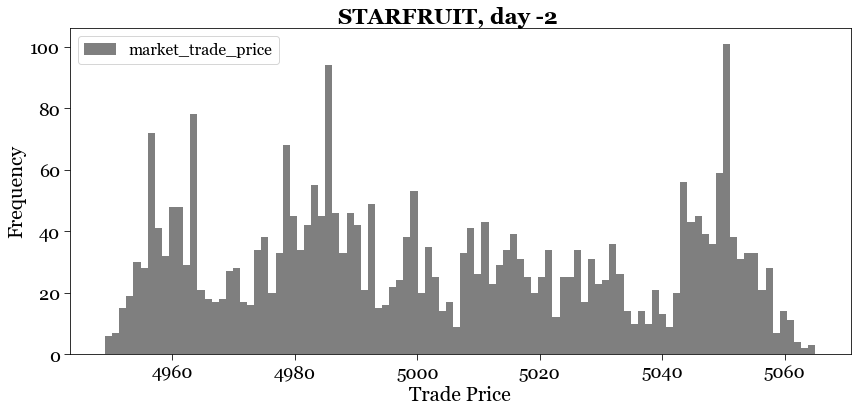

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/2118941163.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/2118941163.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


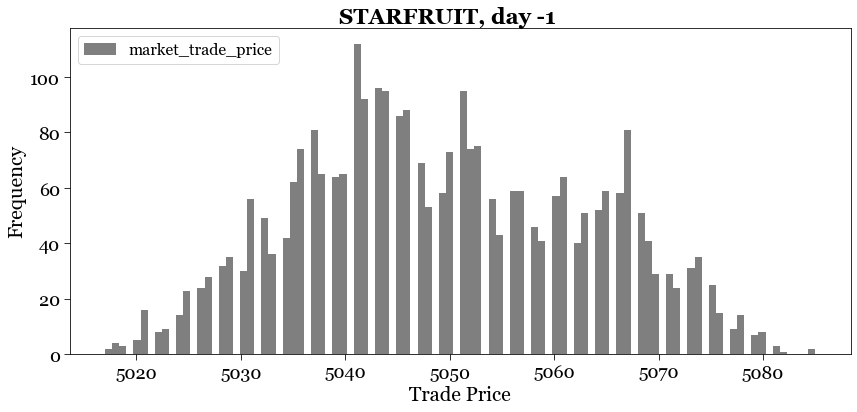

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/2118941163.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/2118941163.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


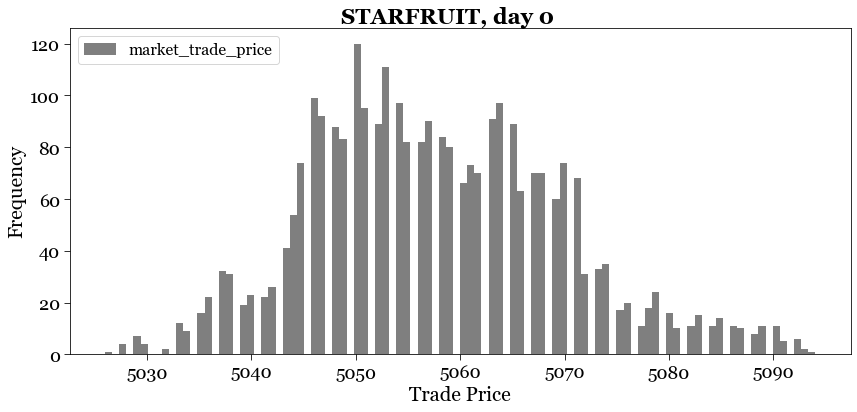

In [10]:
for product in products:
    for day in days:
        filtered_trade = trade[(trade['day'] == day) & (trade['symbol'] == product)]
        filtered_price = price[(price['day'] == day) & (price['product'] == product)]
        
        fig = plt.figure(figsize=(14, 6))
        ax = plt.gca()

        ax.hist(filtered_trade['price'], bins=100, alpha=0.5, 
                color='black', label='market_trade_price')

        # Customize tick sizes
        ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
        # ax.set_xlim(0, 2000)
        # ax.set_ylim(0, 12000)
        ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
        ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

        # Customize the plot (optional)
        plt.xlabel('Trade Price', fontdict=font)
        plt.ylabel('Frequency', fontdict=font)
        plt.gcf().set_facecolor('white')
        fig.suptitle(f'{product}, day {day}', fontproperties=suptitle_font, y=0.93)
        plt.legend(loc='upper left', prop=legend_font)

        # plt.savefig(f'./../plots/R1_{product}_day{day}_trade_histogram.png')
        # plt.savefig(f'./../plots/R1_{product}_day{day}_trade_histogram.pdf')
        plt.show()

Plots of individual bids and asks distribution
   * histogram of `bid_price_1`, scaled by 'bid_volume_1'
   * histogram of `ask_price_1`, scaled by 'ask_volume_1'

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/1843268566.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/1843268566.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


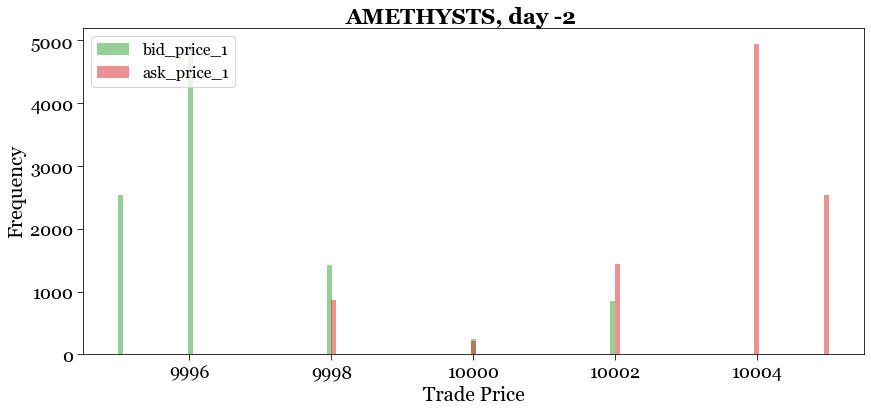

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/1843268566.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/1843268566.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


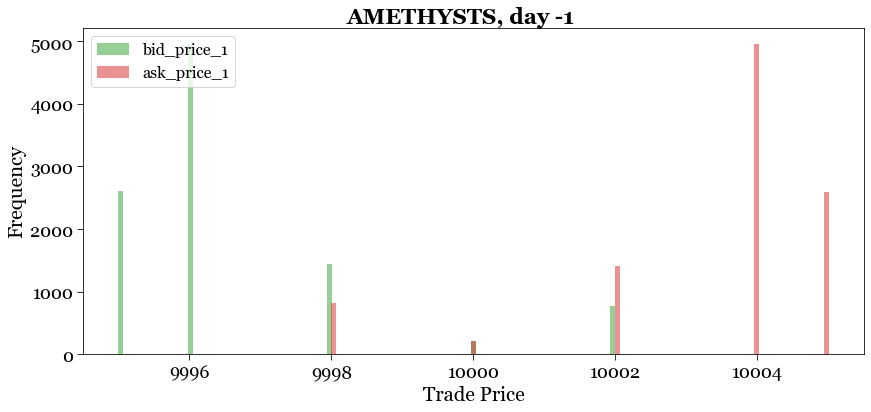

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/1843268566.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/1843268566.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


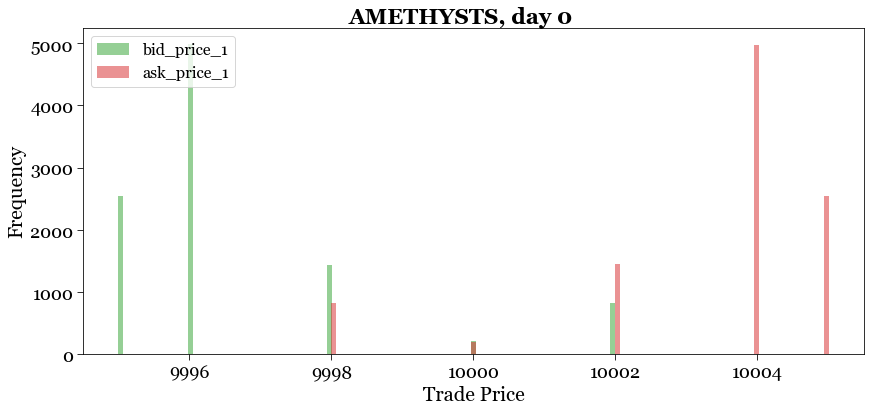

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/1843268566.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/1843268566.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


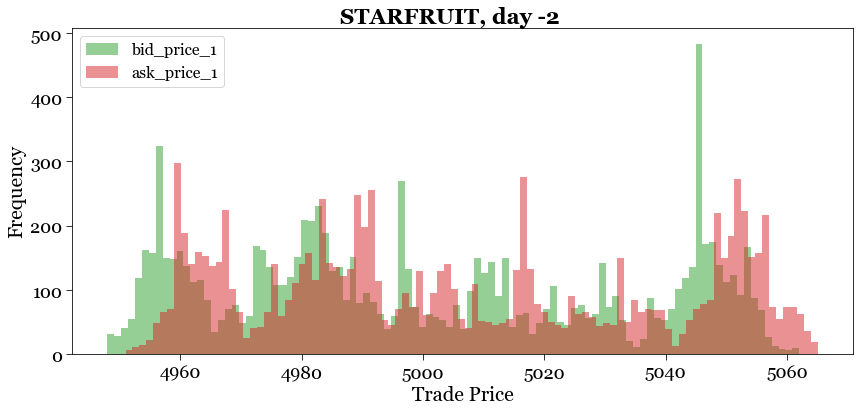

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/1843268566.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/1843268566.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


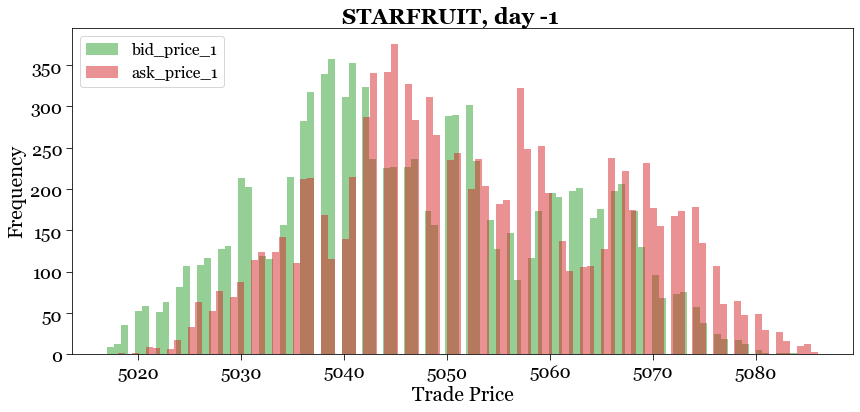

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/1843268566.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/1843268566.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


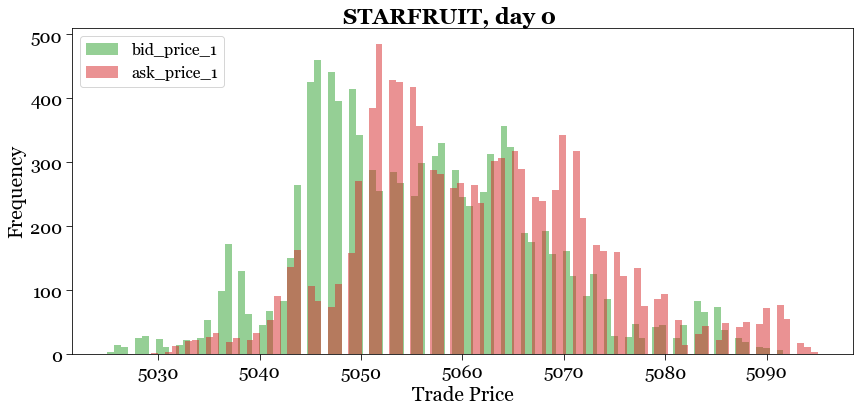

In [11]:
for product in products:
    for day in days:
        filtered_trade = trade[(trade['day'] == day) & (trade['symbol'] == product)]
        filtered_price = price[(price['day'] == day) & (price['product'] == product)]
        
        fig = plt.figure(figsize=(14, 6))
        ax = plt.gca()

        ax.hist(filtered_price['bid_price_1'], bins=100, alpha=0.5, 
                color=tableau_colors[2], label='bid_price_1')
        ax.hist(filtered_price['ask_price_1'], bins=100, alpha=0.5, 
                color=tableau_colors[3], label='ask_price_1')
        
        # Customize tick sizes
        ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
        # ax.set_xlim(0, 2000)
        # ax.set_ylim(0, 12000)
        ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
        ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

        # Customize the plot (optional)
        plt.xlabel('Trade Price', fontdict=font)
        plt.ylabel('Frequency', fontdict=font)
        plt.gcf().set_facecolor('white')
        fig.suptitle(f'{product}, day {day}', fontproperties=suptitle_font, y=0.93)
        plt.legend(loc='upper left', prop=legend_font)

        # plt.savefig(f'./../plots/R1_{product}_day{day}_bid_ask_histogram.png')
        # plt.savefig(f'./../plots/R1_{product}_day{day}_bid_ask_histogram.pdf')
        plt.show()

A histogram of bid-ask spread
   * histogram of `bid_price_1` - `ask_price_1`

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/815927721.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/815927721.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


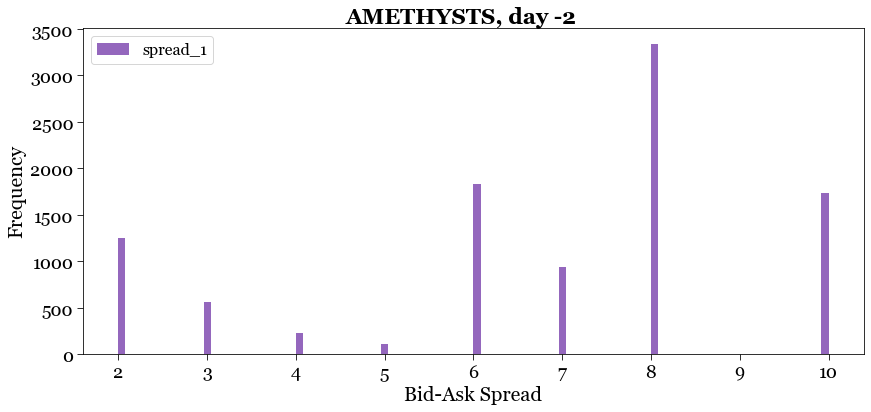

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/815927721.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/815927721.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


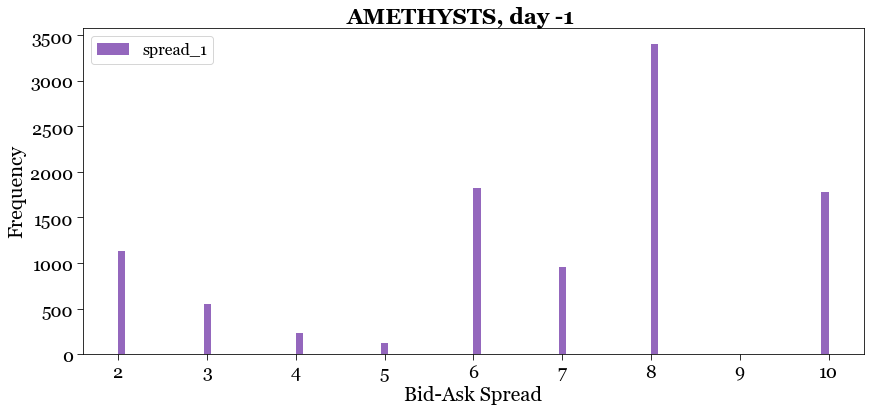

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/815927721.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/815927721.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


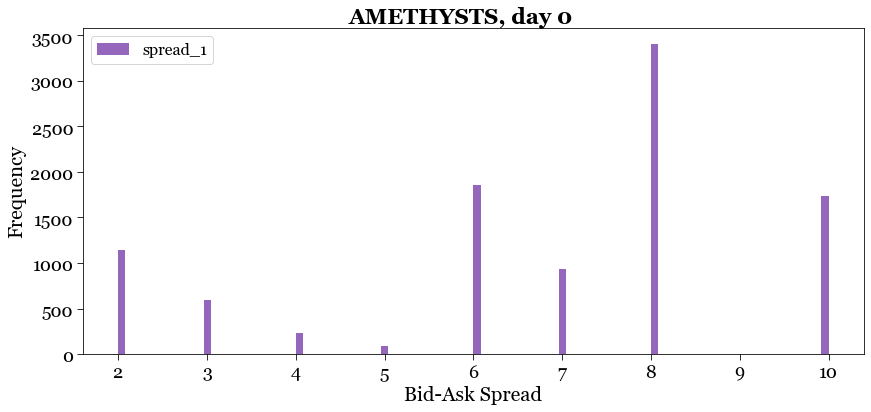

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/815927721.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/815927721.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


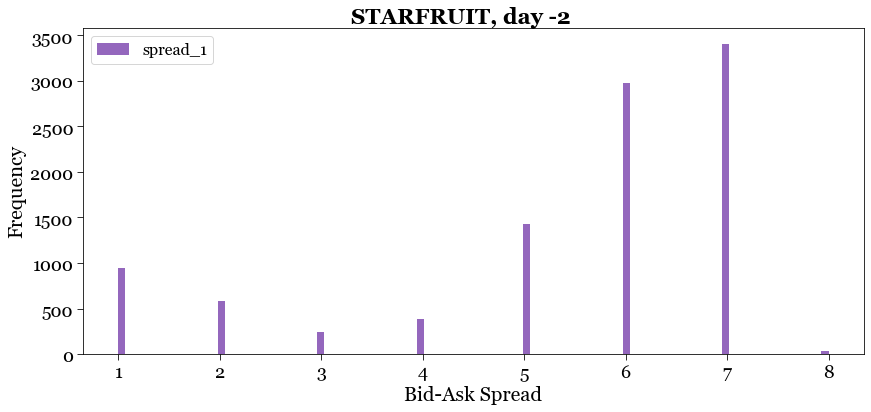

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/815927721.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/815927721.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


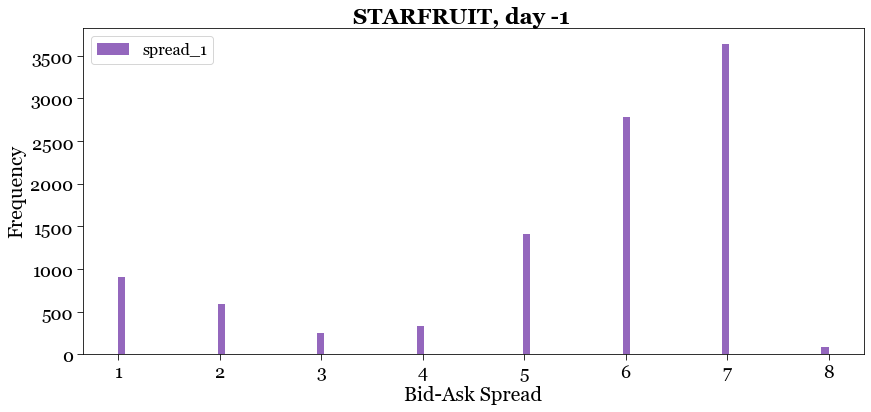

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/815927721.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/815927721.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


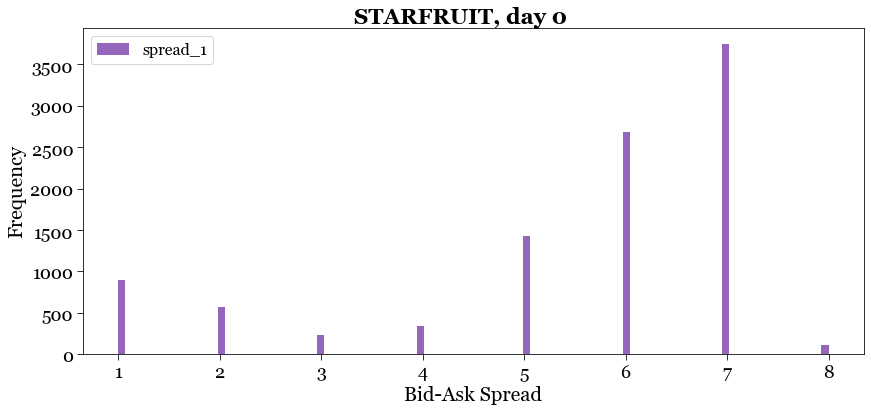

In [12]:
price['spread_1'] = price['ask_price_1'] - price['bid_price_1']

for product in products:
    for day in days:
        filtered_trade = trade[(trade['day'] == day) & (trade['symbol'] == product)]
        filtered_price = price[(price['day'] == day) & (price['product'] == product)]
        
        fig = plt.figure(figsize=(14, 6))
        ax = plt.gca()

        ax.hist(filtered_price['spread_1'], bins=100, alpha=1, 
                color=tableau_colors[4], label='spread_1')
        
        # Customize tick sizes
        ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
        # ax.set_xlim(0, 2000)
        # ax.set_ylim(0, 12000)
        ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
        ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

        # Customize the plot (optional)
        plt.xlabel('Bid-Ask Spread', fontdict=font)
        plt.ylabel('Frequency', fontdict=font)
        plt.gcf().set_facecolor('white')
        fig.suptitle(f'{product}, day {day}', fontproperties=suptitle_font, y=0.93)
        plt.legend(loc='upper left', prop=legend_font)

        # plt.savefig(f'./../plots/R1_{product}_day{day}_bid_ask_spread_histogram.png')
        # plt.savefig(f'./../plots/R1_{product}_day{day}_bid_ask_spread_histogram.pdf')
        plt.show()

### Outline for Correlation Analysis
For each day - 
- Calculate correlation coefficients between different products to understand their relationships.
- Engineer new products if needed, such as the differentials of two existing products.
- Visualize correlations using heatmaps or scatter plots.

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/2616062322.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/2616062322.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


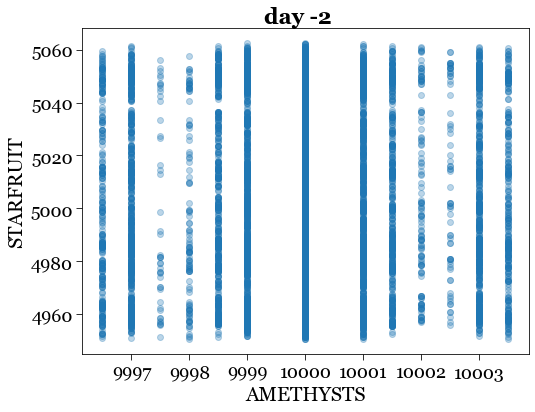

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/2616062322.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/2616062322.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


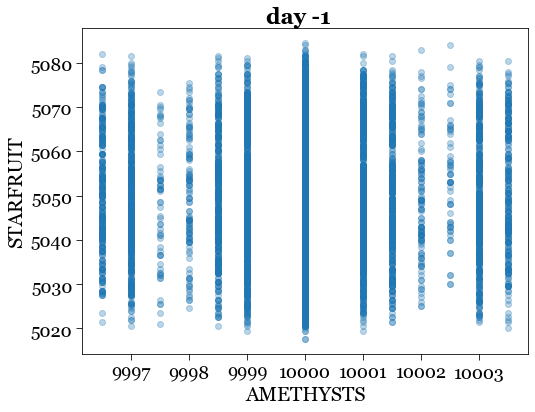

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/2616062322.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/2616062322.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


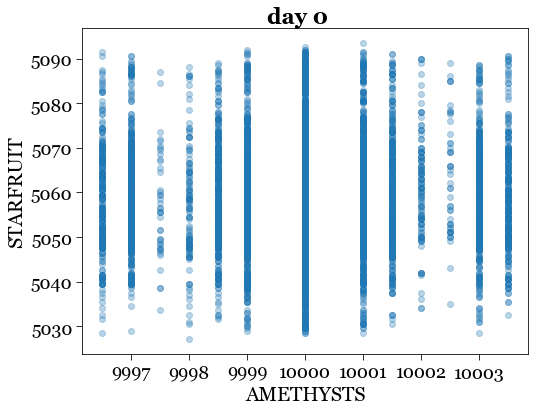

In [13]:
# Select the columns corresponding to the prices of the two products
AM_price = price[price['product'] == 'AMETHYSTS']
ST_price = price[price['product'] == 'STARFRUIT']

for day in days:
    filtered_AM_price = AM_price[(AM_price['day'] == day)]['mid_price']
    filtered_ST_price = ST_price[(ST_price['day'] == day)]['mid_price']
    
    fig = plt.figure(figsize=(8, 6))
    ax = plt.gca()

    ax.scatter(filtered_AM_price, filtered_ST_price, alpha=0.3,
                color=tableau_colors[0], marker='o')

    # Customize tick sizes
    ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
    # ax.set_xlim(0, 2000)
    # ax.set_ylim(0, 12000)
    ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
    ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

    # Customize the plot (optional)
    plt.xlabel('AMETHYSTS', fontdict=font)
    plt.ylabel('STARFRUIT', fontdict=font)
    plt.gcf().set_facecolor('white')
    fig.suptitle(f'day {day}', fontproperties=suptitle_font, y=0.93)
    # plt.legend(loc='upper left', prop=legend_font)

    # plt.savefig(f'./../plots/R1_{product}_day{day}_corr_scatter.png')
    # plt.savefig(f'./../plots/R1_{product}_day{day}_corr_scatter.pdf')
    plt.show()

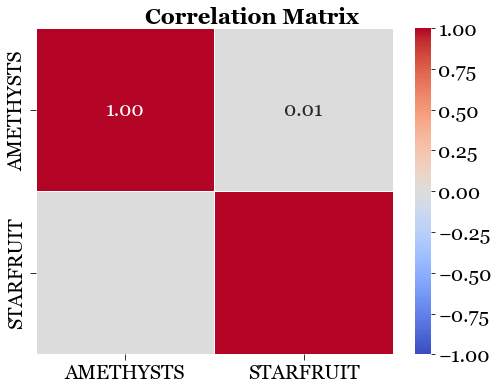

In [17]:
AM_price = price[price['product'] == products[0]]['mid_price'].reset_index(drop=True)
ST_price = price[price['product'] == products[1]]['mid_price'].reset_index(drop=True)

# Calculate the correlation coefficient between the prices of the two products
price_correlation = AM_price.corr(ST_price)

# Create a DataFrame with the prices of the two products
df_prices = pd.DataFrame({products[0]: AM_price, products[1]: ST_price})

# Calculate the correlation matrix
correlation_matrix = df_prices.corr()

# Plot heatmap
fig = plt.figure(figsize=(8, 6))
# ax = plt.gca()

# Plot heatmap with colorbar and customized font
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
                      fmt=".2f", linewidths=0.5, 
                      vmin=-1, vmax=1, cbar=True,
                      cbar_kws={"orientation": "vertical"},
                      annot_kws={"size": 20,
                                 "fontdict": font})

# Adjust label size and tick length for both x and y axes
plt.tick_params(axis='both', which='major', labelsize=18, length=6)

# Set font properties for tick labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontdict=font)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontdict=font)

# Colorbar settings
cbar = heatmap.collections[0].colorbar
cbar.set_label(cbar.ax.get_ylabel(), fontdict=font)
heatmap.figure.axes[-1].yaxis.label.set_size(font['size'])  # Set colorbar label font size
heatmap.figure.axes[-1].tick_params(labelsize=font['size'])  # Set colorbar tick font size
for label in heatmap.figure.axes[-1].get_yticklabels():
    label.set_fontname("Georgia")

plt.gcf().set_facecolor('white')
fig.suptitle(f'Correlation Matrix', fontproperties=suptitle_font, y=0.93)

# plt.savefig(f'./../plots/R1_corr_matrix.png')
# plt.savefig(f'./../plots/R1_corr_matrix.pdf')
plt.show()

In [15]:
correlation_matrix

,AMETHYSTS,STARFRUIT
AMETHYSTS,1.000000,0.005363
STARFRUIT,0.005363,1.000000


### Outline for Volatility Analysis
For each day and each product - 
- Calculate volatility metrics such as standard deviation, variance, or average true range (ATR) for mid-price.
- To calculate instantaneous volatility for a time series of stock prices, you can use methods such as the exponentially weighted moving average (EWMA) of historical returns or the GARCH (Generalized Autoregressive Conditional Heteroskedasticity) model. The EWMA method is simpler and more commonly used for this purpose.
- Plot volatility over time to identify periods of high and low volatility.

In [8]:
# Pivot the DataFrame
df_pivot = price.pivot_table(index=['day', 'timestamp'], 
                             columns='product', values='mid_price')
df_pivot = df_pivot.reset_index()
df_pivot

product,day,timestamp,AMETHYSTS,STARFRUIT
0,-2,0,10000.0,5000.0
1,-2,100,10002.5,5002.0
2,-2,200,10000.0,5000.0
3,-2,300,10000.0,4999.5
4,-2,400,9996.5,4998.5
...,...,...,...,...
29995,0,999500,9998.5,5052.5
29996,0,999600,9999.0,5051.0
29997,0,999700,10000.0,5053.5
29998,0,999800,10000.0,5049.5


Annualized Volatility: 0.0033836631737585708


/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/1878114506.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/1878114506.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


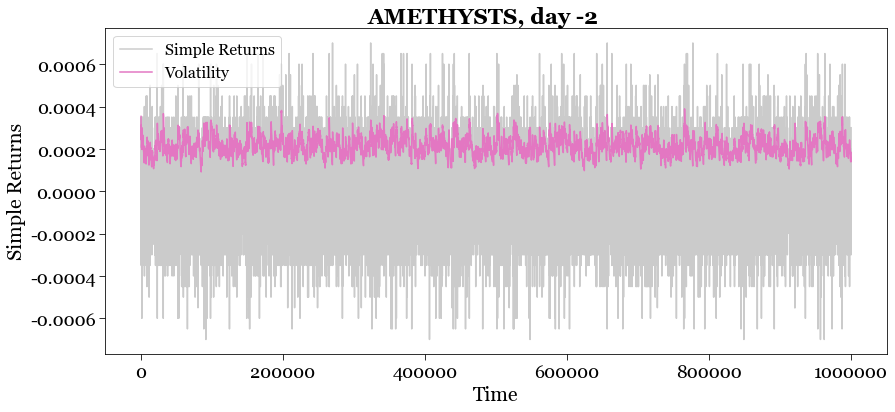

Annualized Volatility: 0.0033028606421198993


/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/1878114506.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/1878114506.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


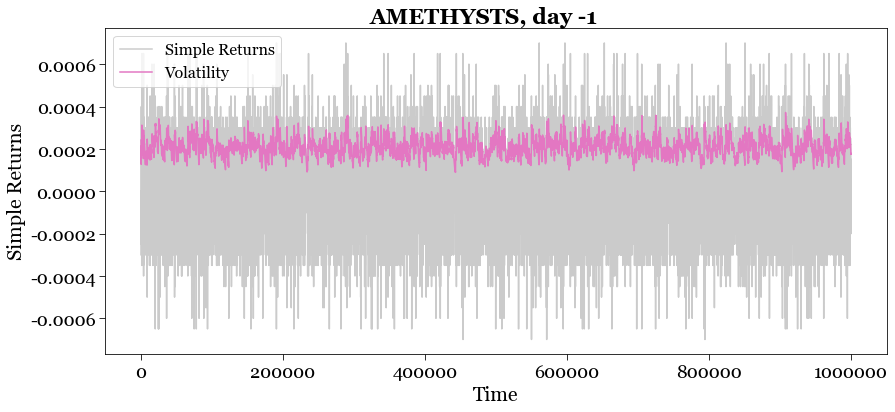

Annualized Volatility: 0.0033720979558208874


/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/1878114506.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/1878114506.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


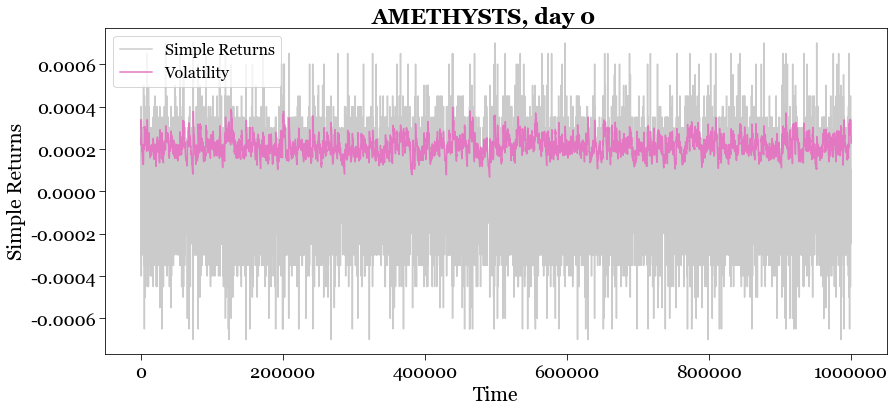

Annualized Volatility: 0.005418289462666526


/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/1878114506.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/1878114506.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


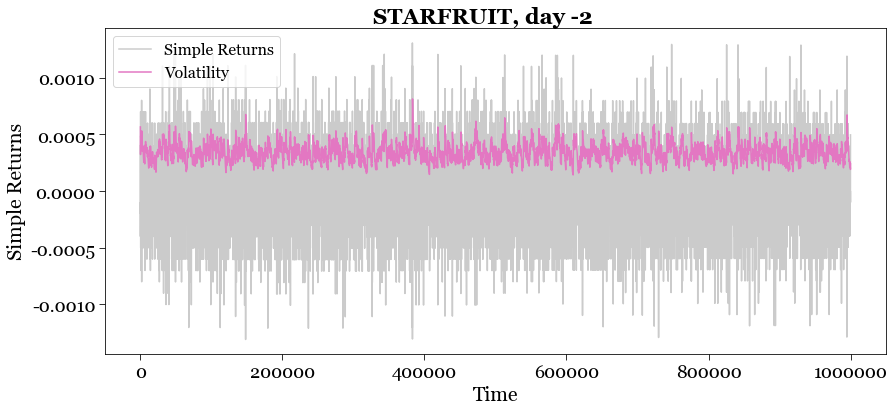

Annualized Volatility: 0.005336490639509617


/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/1878114506.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/1878114506.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


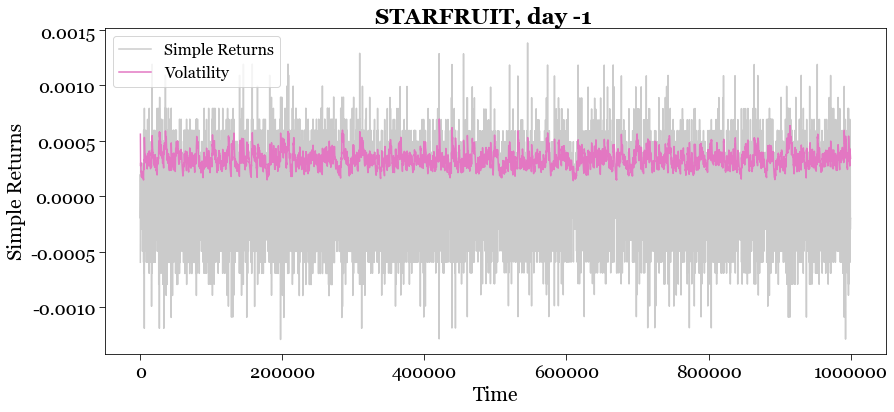

Annualized Volatility: 0.005270561532509452


/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/1878114506.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1334/1878114506.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


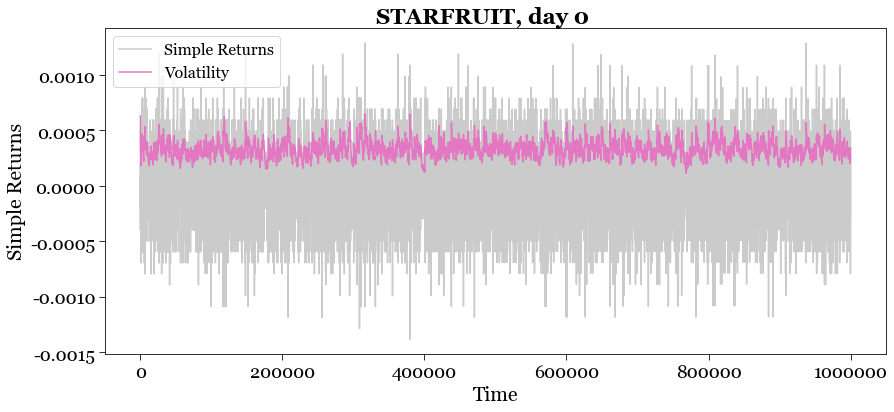

In [16]:
for product in products:
    for day in days:
        filtered_price = price[(price['day'] == day) & (price['product'] == product)]
        # simple return
        returns = filtered_price['mid_price'].pct_change()

        xs = filtered_price['timestamp']

        fig = plt.figure(figsize=(14, 6))
        ax = plt.gca()

        annualized_volatility = returns.std() * np.sqrt(252)
        print("Annualized Volatility:", annualized_volatility)

        # Calculate EWMA volatility
        window_size = 20  # You can adjust this value
        vols = returns.ewm(span=window_size).std()

        ax.plot(xs, returns, label='Simple Returns', 
                color=tableau_colors[7], alpha=0.4)
        ax.plot(xs, vols, label='Volatility', 
                color=tableau_colors[6], alpha=1)
        
        # Customize tick sizes
        ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
        # ax.set_xlim(0, 2000)
        # ax.set_ylim(0, 12000)
        ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
        ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.4f}'))

        # Customize the plot (optional)
        plt.xlabel('Time', fontdict=font)
        plt.ylabel('Returns', fontdict=font)
        plt.gcf().set_facecolor('white')
        fig.suptitle(f'{product}, day {day}', fontproperties=suptitle_font, y=0.93)
        plt.legend(loc='upper left', prop=legend_font)

        # plt.savefig(f'./../plots/R1_{product}_day{day}_vol.png')
        # plt.savefig(f'./../plots/R1_{product}_day{day}_vol.pdf')
        plt.show()

### Outline for Autocorrelation Analysis:
For each product -
- Calculate autocorrelation functions (ACF) and partial autocorrelation functions (PACF) to identify any serial correlation in the time series data.
- Plot ACF and PACF to visualize autocorrelation patterns.

To interpret the plot, 
- Identification of Autoregressive (AR) and Moving Average (MA) Processes: The shape and pattern of the ACF plot can provide insights into the order of autoregressive (AR) and moving average (MA) processes present in the time series data. For example, slowly decaying ACF values suggest an AR process, while sharply decaying ACF values followed by a cutoff suggest an MA process.

If all autocorrelation values in the Autocorrelation Function (ACF) plot are close to 1 with very slight decay, it indicates a strong positive autocorrelation in the time series data. Here are some possible interpretations and considerations:
1. High Persistence: A high autocorrelation indicates that the values in the time series are strongly related to their past values. This suggests a high degree of persistence or memory in the data, where current observations are highly influenced by previous observations.
1. Trend or Seasonality: A persistent ACF plot may indicate the presence of a trend or seasonality in the data. Trends represent long-term patterns or changes in the data, while seasonality refers to repeating patterns that occur at regular intervals.
1. Potential Non-Stationarity: If the autocorrelation values remain close to 1 with very little decay even at high lags, it may indicate non-stationarity in the time series. Non-stationarity occurs when the statistical properties of the data, such as the mean or variance, change over time.
1. Modeling Considerations: When building time series models, it's important to account for the high autocorrelation and potential non-stationarity in the data. Models such as autoregressive integrated moving average (ARIMA) or seasonal ARIMA (SARIMA) may be suitable for capturing the persistence and seasonal patterns in the data.

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3417/3213655947.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3417/3213655947.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


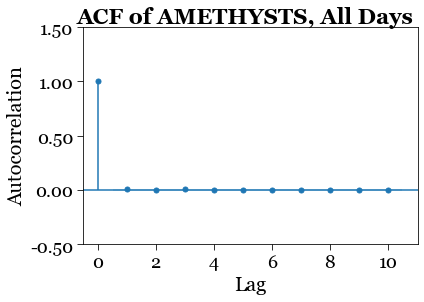

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3417/3213655947.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3417/3213655947.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


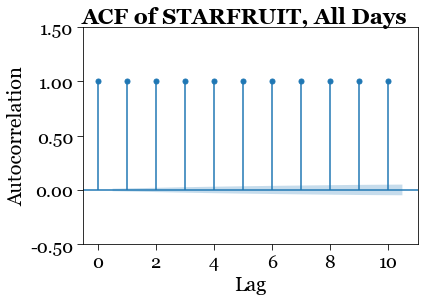

In [21]:
for product in products:
    # Plot Autocorrelation Function (ACF)
    plot_acf(df_pivot[product], lags=10, alpha=0.05)  # Adjust the number of lags and alpha as needed
    ax = plt.gca()
    # Customize tick sizes
    ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
    # ax.set_xlim(0, 2000)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
    ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.2f}'))

    # Customize the plot (optional)
    plt.xlabel('Lag', fontdict=font)
    plt.ylabel('Autocorrelation', fontdict=font)
    plt.title('')
    plt.gcf().set_facecolor('white')
    plt.suptitle(f'ACF of {product}, All Days', 
                    fontproperties=suptitle_font, y=0.95)
    # plt.legend(loc='upper left', prop=legend_font)

    # plt.savefig(f'./../plots/R1_ACF_{product}.png')
    # plt.savefig(f'./../plots/R1_ACF_{product}.pdf')
    plt.show()

### Outline for Stationarity Analysis
For each day and each product - 
- Test for stationarity using statistical tests like the Augmented Dickey-Fuller (ADF) test or the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test.
- If the time series is non-stationary, consider applying differencing techniques to make it stationary.

In [23]:
for product in products:
    print('#'*50)
    print(f"Augmented Dickey-Fuller Test for {product}")
    # Perform the Augmented Dickey-Fuller (ADF) test
    result = adfuller(df_pivot[product])

    # Extracting the test statistic, p-value, and critical values
    test_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]

    # Print the results
    print("ADF Statistic:", test_statistic)
    print("p-value:", p_value)
    print("Critical Values:")
    for key, value in critical_values.items():
        print(f"\t{key}: {value}")

    # Interpret the results
    if p_value < 0.05:
        print("Reject the null hypothesis (H0): The data is stationary.")
    else:
        print("Fail to reject the null hypothesis (H0): The data is non-stationary.")

##################################################
Augmented Dickey-Fuller Test for AMETHYSTS
ADF Statistic: -172.48607503073302
p-value: 0.0
Critical Values:
	1%: -3.4305680025880942
	5%: -2.8616363512511263
	10%: -2.5668212848307097
Reject the null hypothesis (H0): The data is stationary.
##################################################
Augmented Dickey-Fuller Test for STARFRUIT
ADF Statistic: -1.3689061850902022
p-value: 0.5970888092401012
Critical Values:
	1%: -3.43056808256121
	5%: -2.861636386595783
	10%: -2.5668213036438177
Fail to reject the null hypothesis (H0): The data is non-stationary.


In [29]:
first_difference = df_pivot['STARFRUIT'].diff()
first_difference = first_difference.dropna()

# Perform the Augmented Dickey-Fuller (ADF) test
result = adfuller(first_difference)

# Extracting the test statistic, p-value, and critical values
test_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Print the results
print("ADF Statistic:", test_statistic)
print("p-value:", p_value)
print("Critical Values:")
for key, value in critical_values.items():
    print(f"\t{key}: {value}")

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis (H0): The data is stationary.")
else:
    print("Fail to reject the null hypothesis (H0): The data is non-stationary.")

ADF Statistic: -66.874909723012
p-value: 0.0
Critical Values:
	1%: -3.43056808256121
	5%: -2.861636386595783
	10%: -2.5668213036438177
Reject the null hypothesis (H0): The data is stationary.


#### Make the data stationary 
For stationary data:
- ACF can provide insights into the dependence structure of the time series, including the presence of serial correlation at different lags.
- Significant autocorrelation at certain lags may indicate potential patterns or dependencies in the data that can be exploited for modeling and forecasting.

It's common practice to first make the data stationary through techniques like differencing or detrending before analyzing the ACF. Stationarity helps remove spurious autocorrelation and makes the ACF results more interpretable for time series analysis and modeling. 

In [31]:
cols = df_pivot.columns[2:]

In [33]:
# Make the data stationary
for col in cols:
    df_pivot[f'{col}_diff'] = df_pivot[col].diff()
    df_pivot[f'{col}_diff'] = df_pivot[f'{col}_diff'].fillna(0)
df_pivot

product,day,timestamp,AMETHYSTS,STARFRUIT,AMETHYSTS_diff,STARFRUIT_diff
0,-2,0,10000.0,5000.0,0.0,0.0
1,-2,100,10002.5,5002.0,2.5,2.0
2,-2,200,10000.0,5000.0,-2.5,-2.0
3,-2,300,10000.0,4999.5,0.0,-0.5
4,-2,400,9996.5,4998.5,-3.5,-1.0
...,...,...,...,...,...,...
29995,0,999500,9998.5,5052.5,-1.5,1.0
29996,0,999600,9999.0,5051.0,0.5,-1.5
29997,0,999700,10000.0,5053.5,1.0,2.5
29998,0,999800,10000.0,5049.5,0.0,-4.0


/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3417/3795792538.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3417/3795792538.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


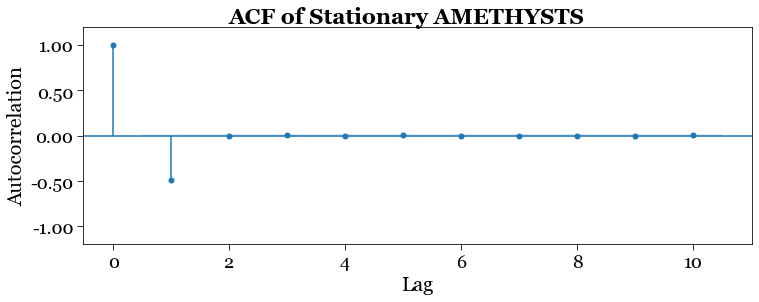

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3417/3795792538.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3417/3795792538.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


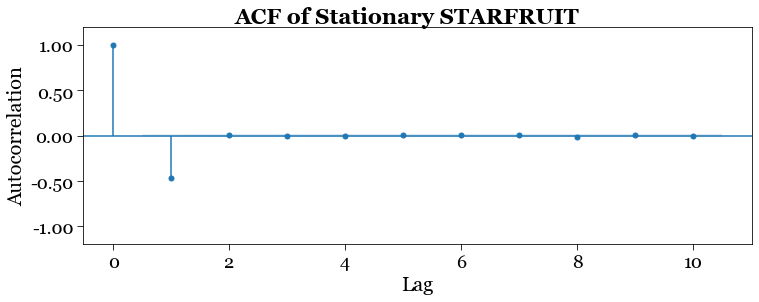

In [40]:
# Plot Autocorrelation Function (ACF)
for col in df_pivot.columns:
    if col[-5::] == '_diff':
        plt.figure(figsize=(12, 4))  # Adjust the width (12 inches) as needed, keep height (6 inches) constant
        ax = plt.gca()

        plot_acf(df_pivot[col], lags=10, alpha=0.05, ax=ax)  # Adjust the number of lags and alpha as needed
        # Customize tick sizes
        ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
        # ax.set_xlim(0, 2000)
        ax.set_ylim(-1.2, 1.2)
        ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
        ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.2f}'))

        # Customize the plot (optional)
        plt.xlabel('Lag', fontdict=font)
        plt.ylabel('Autocorrelation', fontdict=font)
        plt.title('')
        plt.gcf().set_facecolor('white')
        plt.suptitle(f'ACF of Stationary {col[:-5:]}', 
                        fontproperties=suptitle_font, y=0.95)
        # plt.legend(loc='upper left', prop=legend_font)

        # plt.savefig(f'./../plots/R1_ACF_stationary_10_{col[:-5:]}.png')
        # plt.savefig(f'./../plots/R1_ACF_stationary_10_{col[:-5:]}.pdf')
        plt.show()

### Outline for Seasonality Analysis:
- Detect and analyze seasonal patterns in the time series data using methods like seasonal decomposition or Fourier analysis. 

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3417/3918344289.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3417/3918344289.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


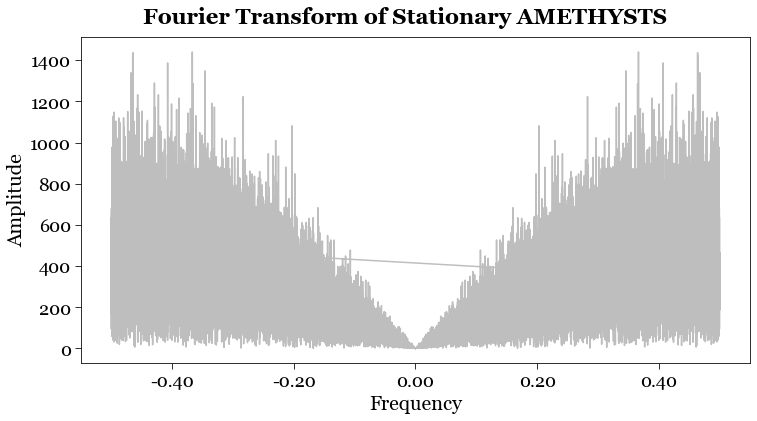

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3417/3918344289.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3417/3918344289.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


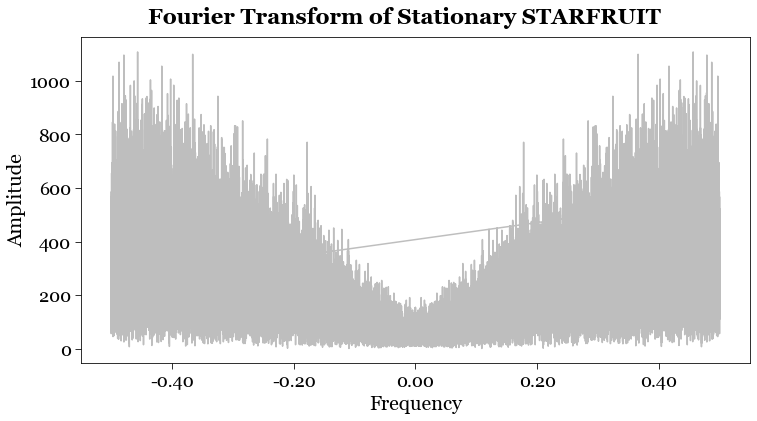

In [42]:
for col in df_pivot.columns:
    if col[-5::] == '_diff':
        plt.figure(figsize=(12, 6))
        ax = plt.gca()

        # Perform Fourier transform
        fourier_transform = np.fft.fft(df_pivot[col])
        
        # Compute the frequencies
        frequencies = np.fft.fftfreq(len(df_pivot[col]))

        ax.plot(frequencies, np.abs(fourier_transform),
                color=tableau_colors[7], alpha=0.5)

        # Customize tick sizes
        ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
        # ax.set_xlim(0, 2000)
        # ax.set_ylim(-1.2, 1.2)
        ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
        ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.2f}'))
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

        # Customize the plot (optional)
        plt.xlabel('Frequency', fontdict=font)
        plt.ylabel('Amplitude', fontdict=font)
        plt.title('')
        plt.gcf().set_facecolor('white')
        plt.suptitle(f'Fourier Transform of Stationary {col[:-5:]}', 
                        fontproperties=suptitle_font, y=0.95)
        # plt.legend(loc='upper left', prop=legend_font)

        # plt.savefig(f'./../plots/R1_FFT_{col[:-5:]}.png')
        # plt.savefig(f'./../plots/R1_FFT_{col[:-5:]}.pdf')
        plt.show()


### Outline for Data Modeling
For each day and each product - 
- Fit moving average model. Experiment with the window size.
- Fit time series models such as ARIMA (AutoRegressive Integrated Moving Average) or GARCH (Generalized Autoregressive Conditional Heteroskedasticity) models to forecast future prices or quantities.
- Evaluate model performance using techniques like backtesting or out-of-sample validation.

In [11]:
df_pivot

product,day,timestamp,AMETHYSTS,STARFRUIT
0,-2,0,10000.0,5000.0
1,-2,100,10002.5,5002.0
2,-2,200,10000.0,5000.0
3,-2,300,10000.0,4999.5
4,-2,400,9996.5,4998.5
...,...,...,...,...
29995,0,999500,9998.5,5052.5
29996,0,999600,9999.0,5051.0
29997,0,999700,10000.0,5053.5
29998,0,999800,10000.0,5049.5


In [10]:
df_pivot['STARFRUIT']

0        5000.0
1        5002.0
2        5000.0
3        4999.5
4        4998.5
          ...  
29995    5052.5
29996    5051.0
29997    5053.5
29998    5049.5
29999    5051.0
Name: STARFRUIT, Length: 30000, dtype: float64

In [ ]:
# Set up data structure to 
model_results = {
    'AMETHYSTS': {
        'MA': {
            'NAME': 'Moving Average',
            'ERR': None,
            'BEST_PARAM': [],
            'BEST_PRED': [],
        },
        'LR': {
            'NAME': 'Linear Regression',
            'ERR': None,
            'BEST_PARAM': [],
            'BEST_PRED': [],
        },
    },
    
    'STARFRUIT': {
        'MA': {
            'NAME': 'Moving Average',
            'ERR': None,
            'BEST_PARAM': [],
            'BEST_PRED': [],
        },
        'LR': {
            'NAME': 'Linear Regression',
            'ERR': None,
            'BEST_PARAM': [],
            'BEST_PRED': [],
        },
    },
}


In [26]:
# Moving Average model simply calculates the average 
# of the last window_size data points
# Data used to predict time t is from t-window_size to t-1
def train_moving_average_model(data, window_size):
    predictions = np.zeros(len(data) - window_size)
    for i in range(window_size, len(data)):
        # Calculate moving average
        prediction = np.mean(data[i-window_size:i])
        predictions[i-window_size] = prediction

    return predictions


# Example function to calculate mean squared error
def mean_squared_error(true_values, predicted_values):
    mse = np.mean((true_values - predicted_values) ** 2)

    return mse

In [27]:
stock_data = df_pivot['STARFRUIT']

# Experiment with different window sizes
window_sizes = list(range(1, 15))
best_mse = float('inf')
best_window_size = None
best_predictions = None

for window_size in window_sizes:
    # Train moving average model
    predictions = train_moving_average_model(stock_data, window_size)
    
    # Evaluate model performance
    mse = mean_squared_error(stock_data[window_size:], predictions)
    
    # Update best model if needed
    if mse < best_mse:
        best_mse = mse
        best_window_size = window_size
        best_predictions = predictions

print(f'Best window size: {best_window_size}')
print(f'Best MSE: {best_mse}')
# print(f'Predictions: {best_predictions}')

Best window size: 4
Best MSE: 2.005306436691559
Predictions: [5000.375 5000.    5000.    ... 5051.75  5052.125 5051.625]


In [ ]:
for product in products:
    # get best window size for moving average model
    filtered_price = price[(price['day'] == day) & (price['product'] == product)]
    # simple return
    returns = filtered_price['mid_price'].pct_change()

    xs = filtered_price['timestamp']

    fig = plt.figure(figsize=(14, 6))
    ax = plt.gca()

    annualized_volatility = returns.std() * np.sqrt(252)
    print("Annualized Volatility:", annualized_volatility)

    # Calculate EWMA volatility
    window_size = 20  # You can adjust this value
    vols = returns.ewm(span=window_size).std()

    ax.plot(xs, returns, label='Simple Returns', 
            color=tableau_colors[7], alpha=0.4)
    ax.plot(xs, vols, label='Volatility', 
            color=tableau_colors[6], alpha=1)

    # Customize tick sizes
    ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
    # ax.set_xlim(0, 2000)
    # ax.set_ylim(0, 12000)
    ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
    ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.4f}'))

    # Customize the plot (optional)
    plt.xlabel('Time', fontdict=font)
    plt.ylabel('Returns', fontdict=font)
    plt.gcf().set_facecolor('white')
    fig.suptitle(f'{product}, day {day}', fontproperties=suptitle_font, y=0.93)
    plt.legend(loc='upper left', prop=legend_font)

    # plt.savefig(f'./../plots/R1_{product}_day{day}_vol.png')
    # plt.savefig(f'./../plots/R1_{product}_day{day}_vol.pdf')
    plt.show()

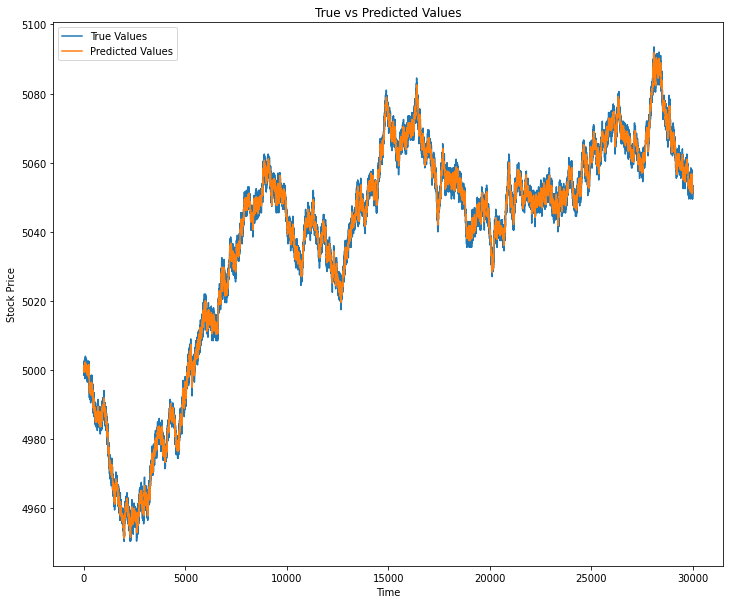

AttributeError: 'NoneType' object has no attribute 'plot'

In [23]:
for product in products:


# Plot true values and predicted values
plt.figure(figsize=(12, 10))  # Adjust the width (12 inches) as needed, keep height (6 inches) constant
plt.plot(stock_data, label='True Values')
plt.plot(range(best_window_size, len(stock_data)), best_predictions, label='Predicted Values')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('True vs Predicted Values')
plt.legend()
plt.show().plot()

In [28]:
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Example usage
# Load historical stock price data (example)
# Replace this with your own data
stock_data = pd.Series([50, 51, 52, 55, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70])

# Calculate RSI
rsi = calculate_rsi(stock_data)

print(rsi)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13     93.750000
14     94.117647
15     94.117647
16     94.117647
17     93.333333
18    100.000000
19    100.000000
dtype: float64
